In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
data2 = {
    'Precio':[505000,450000,220000,799000,1950000,675000,1898999,2650000,1390000,575000,591000,459999,1075000,1695000,944999,569000,449000,894999,
              699000,740000,470000,765000,589000,999000,370000,325000,1175000,351000,551000,819999,990000,925000,535000,860000,145000,409000,490000,
              1900000,3850000,1125000,2300000,1095000,1575000,2400000,525000,625000,605000,412000,625000,511000,1150000,885000,470000,1611000,475000,
              865000,3800000,2475000,400000,440000,2800000,645000,365000,1044999,515000,455000,1800000,3499000,1250000,775000,825000,2250000,865000,
              299000,570000,385000,350000,2345000,1650000,1100000,2900000,545000,2990000,615000,890000,430000,1650000,1599000,691000,650000,415000,
              669000,2950000,3900000,525000,750000,445000,493000,611000,475000],
    'Anio':[2017,2014,2011,2019,2018,2017,2015,2017,2017,2015,2017,2018,2019,2019,2017,2016,2019,2018,2020,2016,2020,2015,2018,2019,2019,2013,2019,
            2014,2015,2018,2020,2016,2015,2013,2009,2018,2018,2019,2017,2018,2014,2016,2013,2010,2015,2015,2019,2016,2016,2015,2017,2016,2019,2019,
            2017,2015,2018,2020,2014,2016,2017,2017,2013,2021,2019,2015,2012,2019,2012,2021,2021,2016,2017,2013,2017,2013,2014,2017,2022,2011,2018,
            2017,2018,2017,2016,2015,2013,2015,2019,2016,2015,2016,2015,2018,2015,2018,2016,2012,2017,2014],
    'Kilometraje':[87150,75000,67000,37500,69000,73315,47000,75000,56000,85000,20281,22541,30672,20856,41417,11471,3583,21365,30777,60125,2169,60240,
                   13772,27464,47377,23086,36313,39276,47752,27963,24013,66000,28000,67000,72000,27069,43000,71000,45600,60000,105101,45000,66000,
                   34105,68397,65000,27469,41058,51330,45969,66602,57983,11183,46301,34867,43634,9512,11293,78000,50374,15900,64000,78000,24000,40310,
                   69700,74073,73000,50000,24000,43000,40500,49013,64983,92270,65000,110000,47000,10000,51500,35000,61518,34000,36058,88000,98112,58000,
                   92355,16652,76584,42500,70000,84700,83400,68766,16339,63882,28732,51349,61866],
    'Tanque':[35,42,35,37,55,43,50,51,50,50,45,28,43,50,45,35,35,37,32,60,27,55,35,45,60,43,60,35,45,40,45,60,52,50,35,35,35,55,66,55,70,55,63,70,45,
              60,37,35,43,43,60,60,28,60,35,55,67,60,60,35,57,40,45,48,40,43,67,80,50,37,37,50,40,45,40,45,35,70,57,66,64,37,63,37,60,55,66,65,37,50,
              35,48,50,50,45,43,35,55,45,43]
}

Intercepto (B0): -180940940.75112793
Coeficiente (Anio, B1): 89028.82110628912
Coeficiente (Kilometraje, B2): -2.1985724126543964
Coeficiente (Tanque, B3): 54390.42142855501


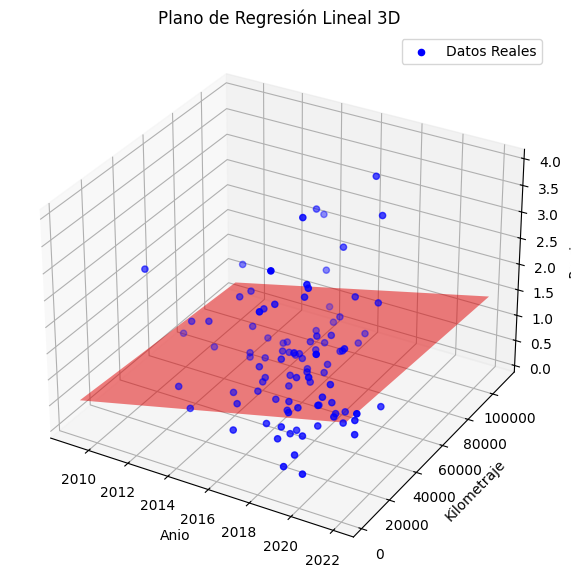

In [21]:
df = pd.DataFrame(data2)
X = df[['Anio', 'Kilometraje', 'Tanque']]
y = df['Precio']
modelo = LinearRegression()
modelo.fit(X, y)
beta_0 = modelo.intercept_
beta_1, beta_2, beta_3 = modelo.coef_

print(f"Intercepto (B0): {beta_0}")
print(f"Coeficiente (Anio, B1): {beta_1}")
print(f"Coeficiente (Kilometraje, B2): {beta_2}")
print(f"Coeficiente (Tanque, B3): {beta_3}")

#plt.scatter(df['Anio'], y, color='blue', label='Datos Reales')
#plt.plot(df['Anio'], modelo.predict(X), color='red', label='Linea de Regresión')
#plt.title('Regresión Lineal: Precio vs Anio')
#plt.xlabel('Anio')
#plt.ylabel('Precio')
#plt.legend()
#plt.show()

anio = np.linspace(df['Anio'].min(), df['Anio'].max(), 10)
kilometraje = np.linspace(df['Kilometraje'].min(), df['Kilometraje'].max(), 10)
Anio, Kilometraje = np.meshgrid(anio, kilometraje)
Tanque = np.mean(df['Tanque']) * np.ones_like(Anio)

# Calcular las predicciones de precios para el plano
Precio = modelo.intercept_ + modelo.coef_[0] * Anio + modelo.coef_[1] * Kilometraje + modelo.coef_[2] * Tanque

# Graficar
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Anio'], df['Kilometraje'], df['Precio'], color='blue', label='Datos Reales')
ax.plot_surface(Anio, Kilometraje, Precio, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Anio')
ax.set_ylabel('Kilometraje')
ax.set_zlabel('Precio')
ax.set_title('Plano de Regresión Lineal 3D')

plt.legend()
plt.show()

In [24]:
nuevo_X = np.array([[2017, 87150, 35],[2014, 75000, 42]])
predicciones = modelo.predict(nuevo_X)

print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Anio: {nuevo_X[i][0]} T, Kilometraje: {nuevo_X[i][1]} k/h, tanque: {nuevo_X[i][2]}): {pred:.2f} tamaño")


Predicciones:
Predicción 1 para (Anio: 2017 T, Kilometraje: 87150 k/h, tanque: 35): 342250.58 tamaño
Predicción 2 para (Anio: 2014 T, Kilometraje: 75000 k/h, tanque: 42): 482609.73 tamaño


C:\Users\Mary\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['Anio', 'Kilometraje', 'Tanque']]
y = df['Precio']

model = LinearRegression()

model.fit(X, y)

predicciones = model.predict(X)

r2 = r2_score(y, predicciones)
mae = mean_absolute_error(y, predicciones)
mse = mean_squared_error(y, predicciones)
rmse = np.sqrt(mse)

print(f'R^2 (Coeficiente de determinacion): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R^2 (Coeficiente de determinacion): 0.5034353243839218
Error Absoluto Medio (MAE): 415234.7924880582
